# Project 1: SAT & ACT Analysis

## Problem Statement

Following the release of a new SAT format in 2016, the College Board is keen to drive participation rates for the examination across the country. This project aims to analyze the state participation rates and scores for both the SAT and the ACT examinations in 2017 and 2018, to identify key factors influencing these metrics and provide recommendations on how the College Board can best allocate its funds to further improve the numbers. 

## Executive Summary


### Content:
- [2017 Data Import & Cleaning](#2017-Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

In [415]:
#Importing relevant libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

In [416]:
#Code:
sat_2017 = pd.read_csv('../data/sat_2017.csv')
act_2017 = pd.read_csv('../data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [417]:
#Code:
#SAT 2017 data
sat_2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [418]:
#Code:
#ACT 2017 data
act_2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data


Answer: The SAT dataset has 5 columns providing the state, participation rate (in percentage), average scores for the evidence-based reading and writing and math sections, as well as the average total scores for 2017. There are 51 rows (the column titles and a row each for the 50 states)

Likewise, the ACT dataset has 7 columns providing the state, participation rate (in percentage), average scores for the english, math, reading and science sections, as well as the average composite scores for 2017. There are 52 rows (the column titles, a row each for the 50 states, and row with the national averages). 


In [419]:
#Code:
sat_2017.shape

(51, 5)

In [420]:
#Code:
act_2017.shape

(52, 7)

#### 4a. Does the data look complete? 

Answer: While the ACT dataframe consists of a row with the national averages, the SAT dataframe only provides data on the state-level scores.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

Answer: The SAT score ranges between 400 - 1600, with the possible scores for each section ranging between 200 - 800. The ACT composite score ranges between 1 - 36. It is the average of all 4 sections which are also scored between 1-36.

Errors in the data: 

The average math SAT score for the state of Maryland is 52, which is below the minimum possible. Upon comparing with the source data, we find that there is a typographical error and the score should be 524 instead of 52. 

Upon inspection of the source data, we also see that average science ACT score for the state of Maryland is reported incorrectly as 2.3, instead of 23.2.

Finally, there is a typographical error in the average composite ACT score for the state of Wyoming. 

In [421]:
#Code:
#Error in the Maryland math SAT score
sat_2017.iloc[20,3]

52

In [422]:
#Code:
#Error in the Maryland science ACT score
act_2017.iloc[21,5]

2.3

In [423]:
#Code:
#Error in the Wyoming composite ACT score
act_2017.iloc[51,6]

'20.2x'

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [424]:
#Code:
#Updating the math SAT score for Maryland using the iloc function
sat_2017.iloc[20, 3] = 524
sat_2017.iloc[20, 3]

524

In [425]:
#Code:
#Updating the science ACT score for Maryland using the iloc function
act_2017.iloc[21,5] = 23.2
act_2017.iloc[21,5]

23.2

#### 5. What are your data types? 
Display the data types of each feature. 

In [426]:
#Code:
#SAT datatypes
sat_2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [427]:
#Code:
#ACT datatypes
act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer: The participation columns for both the SAT and ACT dataframes are shown as object datatypes, and the composite column in the ACT dataframe is also reflected as an object datatype. Ideally, these columns should have int or float datatypes.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [428]:
#Code:
#Defining function to convert participation rates from object to int type
def convert_participation(column):
        column = column.replace('%', '')
        column = int(column)
        return(column)

In [429]:
#Code:
#Applying function to SAT participation column
sat_2017['Participation'] = sat_2017['Participation'].map(lambda x: convert_participation(x))
sat_2017.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5,593,572,1165
1,Alaska,38,547,533,1080
2,Arizona,30,563,553,1116
3,Arkansas,3,614,594,1208
4,California,53,531,524,1055


In [430]:
#Code:
#Applying function to ACT participation column
act_2017['Participation'] = act_2017['Participation'].map(lambda x: convert_participation(x))
act_2017.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,60,20.3,20.7,21.4,21.0,21.0
1,Alabama,100,18.9,18.4,19.7,19.4,19.2
2,Alaska,65,18.7,19.8,20.4,19.9,19.8
3,Arizona,62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100,18.9,19.0,19.7,19.5,19.4


- Fix any individual values preventing other columns from being the appropriate type.

In [431]:
#Code:
#Inspecting values within the ACT dataframe's composite column
act_2017['Composite'].unique()

array(['21.0', '19.2', '19.8', '19.7', '19.4', '22.8', '20.8', '25.2',
       '24.1', '24.2', '21.4', '19.0', '22.3', '22.6', '21.9', '21.7',
       '20.0', '19.5', '24.3', '23.6', '25.4', '21.5', '18.6', '20.4',
       '20.3', '17.8', '25.5', '23.9', '19.1', '22.0', '21.8', '23.7',
       '24.0', '18.7', '20.7', '23.8', '20.5', '20.2x'], dtype=object)

In [432]:
#Code:
#Fixing the value preventing the column from being numeric type
act_2017.iloc[51,6] = 20.2
act_2017.iloc[51,6]

20.2

- Finish your data modifications by making sure the columns are now typed appropriately.

In [433]:
#Code:
#Converting composite column to float
act_2017['Composite'] = act_2017['Composite'].apply(lambda x: float(x))

- Display the data types again to confirm they are correct.

In [434]:
#Code:
sat_2017.dtypes

State                                 object
Participation                          int64
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [435]:
#Code:
act_2017.dtypes

State             object
Participation      int64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [436]:
#Code:
#Updating SAT column names
sat_2017.columns = ['state', 'sat_participation_17', 'sat_erw_17', 'sat_math_17', 'sat_total_17']
sat_2017.columns

Index(['state', 'sat_participation_17', 'sat_erw_17', 'sat_math_17',
       'sat_total_17'],
      dtype='object')

In [437]:
#Code:
#Updating ACT column names
act_2017.columns = ['state', 'act_participation_17', 'act_eng_17', 'act_math_17', 
                    'act_reading_17', 'act_sci_17', 'act_composite_17']
act_2017.columns

Index(['state', 'act_participation_17', 'act_eng_17', 'act_math_17',
       'act_reading_17', 'act_sci_17', 'act_composite_17'],
      dtype='object')

#### 8. Create a data dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|2017 SAT| - | 
|sat_part_17|integer|2017 SAT|SAT participation rate (in percentage)|
|sat_erw_17|integer|2017 SAT|Average SAT evidence-based reading and writing score for the state (out of 800)|
|sat_math_17|integer|2017 SAT|Average SAT math score for the state (out of 800)|
|sat_math_17|integer|2017 SAT|Average total SAT score for the state (out of 1600)|

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|2017 ACT|-| 
|act_participation_17|integer|2017 ACT|ACT participation rate (in percentage)| 
|act_eng_17|float|2017 ACT|Average ACT english score for the state (out of 36)| 
|act_math_17|float|2017 ACT|Average ACT math score for the state (out of 36)| 
|act_reading_17|float|2017 ACT|Average ACT reading score for the state (out of 36)| 
|act_sci_17|float|2017 ACT|Average ACT science score for the state (out of 36)| 
|act_composite_17|float|2017 ACT|Average ACT composite score for the state (out of 36)| 

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [438]:
#Code:
#We identified an extra row in the ACT dataframe
act_2017.head()

,state,act_participation_17,act_eng_17,act_math_17,act_reading_17,act_sci_17,act_composite_17
0,National,60,20.3,20.7,21.4,21.0,21.0
1,Alabama,100,18.9,18.4,19.7,19.4,19.2
2,Alaska,65,18.7,19.8,20.4,19.9,19.8
3,Arizona,62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100,18.9,19.0,19.7,19.5,19.4


In [439]:
#Code:
#Dropping the extra row
act_2017 = act_2017.drop([0], axis = 0)
act_2017.head()

,state,act_participation_17,act_eng_17,act_math_17,act_reading_17,act_sci_17,act_composite_17
1,Alabama,100,18.9,18.4,19.7,19.4,19.2
2,Alaska,65,18.7,19.8,20.4,19.9,19.8
3,Arizona,62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100,18.9,19.0,19.7,19.5,19.4
5,California,31,22.5,22.7,23.1,22.2,22.8


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [440]:
#Code:
combined_2017 = pd.merge(sat_2017, act_2017, on = 'state')
combined_2017.head()

,state,sat_participation_17,sat_erw_17,sat_math_17,sat_total_17,act_participation_17,act_eng_17,act_math_17,act_reading_17,act_sci_17,act_composite_17
0,Alabama,5,593,572,1165,100,18.9,18.4,19.7,19.4,19.2
1,Alaska,38,547,533,1080,65,18.7,19.8,20.4,19.9,19.8
2,Arizona,30,563,553,1116,62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,3,614,594,1208,100,18.9,19.0,19.7,19.5,19.4
4,California,53,531,524,1055,31,22.5,22.7,23.1,22.2,22.8


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [441]:
#Code:
combined_2017.to_csv('../data/combined_2017.csv')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [442]:
#Code:
#Reading in the 2018 SAT and ACT data
sat_2018 = pd.read_csv('../data/sat_2018.csv')
act_2018 = pd.read_csv('../data/act_2018_updated.csv')

In [443]:
#Code:
#Displaying SAT data
sat_2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [444]:
#Code:
#Displaying ACT data
act_2018.head()

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4
4,California,27,22.7,22.5,22.5,23.0,22.1


In [445]:
sat_2017.head()

,state,sat_participation_17,sat_erw_17,sat_math_17,sat_total_17
0,Alabama,5,593,572,1165
1,Alaska,38,547,533,1080
2,Arizona,30,563,553,1116
3,Arkansas,3,614,594,1208
4,California,53,531,524,1055


In [446]:
#Code:
#Updating SAT column names
sat_2018.columns = ['state', 'sat_participation_18', 'sat_erw_18', 'sat_math_18', 'sat_total_18']
sat_2018.columns

Index(['state', 'sat_participation_18', 'sat_erw_18', 'sat_math_18',
       'sat_total_18'],
      dtype='object')

In [447]:
act_2017.head()

,state,act_participation_17,act_eng_17,act_math_17,act_reading_17,act_sci_17,act_composite_17
1,Alabama,100,18.9,18.4,19.7,19.4,19.2
2,Alaska,65,18.7,19.8,20.4,19.9,19.8
3,Arizona,62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100,18.9,19.0,19.7,19.5,19.4
5,California,31,22.5,22.7,23.1,22.2,22.8


In [448]:
#Code:
#Updating ACT column names
act_2018.columns = ['state', 'act_participation_18', 'act_composite_18', 'act_eng_18', 
                    'act_math_18', 'act_reading_18', 'act_sci_18']
act_2018.columns

Index(['state', 'act_participation_18', 'act_composite_18', 'act_eng_18',
       'act_math_18', 'act_reading_18', 'act_sci_18'],
      dtype='object')

In [449]:
#Code:
#Rearranging ACT columns to align with 2017 ACT data
act_2018 = act_2018[['state', 'act_participation_18', 'act_eng_18', 'act_math_18', 
                     'act_reading_18', 'act_sci_18', 'act_composite_18']]
act_2018.head()

,state,act_participation_18,act_eng_18,act_math_18,act_reading_18,act_sci_18,act_composite_18
0,Alabama,100,18.9,18.3,19.6,19.0,19.1
1,Alaska,33,19.8,20.6,21.6,20.7,20.8
2,Arizona,66,18.2,19.4,19.5,19.2,19.2
3,Arkansas,100,19.1,18.9,19.7,19.4,19.4
4,California,27,22.5,22.5,23.0,22.1,22.7


In [450]:
#Code:
#Checking datatypes for the SAT and ACT data
sat_2018.dtypes

state                   object
sat_participation_18    object
sat_erw_18               int64
sat_math_18              int64
sat_total_18             int64
dtype: object

In [451]:
#Code:
#Checking datatypes for the SAT and ACT data
act_2018.dtypes

state                    object
act_participation_18      int64
act_eng_18              float64
act_math_18             float64
act_reading_18          float64
act_sci_18              float64
act_composite_18        float64
dtype: object

In [452]:
#Code:
#Transforming SAT participation column from object to int datatype
sat_2018['sat_participation_18'] = sat_2018['sat_participation_18'].map(lambda x: convert_participation(x))
sat_2018.dtypes

state                   object
sat_participation_18     int64
sat_erw_18               int64
sat_math_18              int64
sat_total_18             int64
dtype: object

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [453]:
#Code:
#Merging 2018 SAT and ACT data
combined_2018 = pd.merge(sat_2018, act_2018, on = 'state')
combined_2018.head()

,state,sat_participation_18,sat_erw_18,sat_math_18,sat_total_18,act_participation_18,act_eng_18,act_math_18,act_reading_18,act_sci_18,act_composite_18
0,Alabama,6,595,571,1166,100,18.9,18.3,19.6,19.0,19.1
1,Alaska,43,562,544,1106,33,19.8,20.6,21.6,20.7,20.8
2,Arizona,29,577,572,1149,66,18.2,19.4,19.5,19.2,19.2
3,Arkansas,5,592,576,1169,100,19.1,18.9,19.7,19.4,19.4
4,California,60,540,536,1076,27,22.5,22.5,23.0,22.1,22.7


In [454]:
#Code:
#Saving combined 2018 data as a csv file
combined_2018.to_csv('../data/combined_2018.csv')

In [455]:
#Code:
#Merging combined 2017 and 2018 data
final = pd.merge(combined_2017, combined_2018, on = 'state')
final.head()

,state,sat_participation_17,sat_erw_17,sat_math_17,sat_total_17,act_participation_17,act_eng_17,act_math_17,act_reading_17,act_sci_17,...,sat_participation_18,sat_erw_18,sat_math_18,sat_total_18,act_participation_18,act_eng_18,act_math_18,act_reading_18,act_sci_18,act_composite_18
0,Alabama,5,593,572,1165,100,18.9,18.4,19.7,19.4,...,6,595,571,1166,100,18.9,18.3,19.6,19.0,19.1
1,Alaska,38,547,533,1080,65,18.7,19.8,20.4,19.9,...,43,562,544,1106,33,19.8,20.6,21.6,20.7,20.8
2,Arizona,30,563,553,1116,62,18.6,19.8,20.1,19.8,...,29,577,572,1149,66,18.2,19.4,19.5,19.2,19.2
3,Arkansas,3,614,594,1208,100,18.9,19.0,19.7,19.5,...,5,592,576,1169,100,19.1,18.9,19.7,19.4,19.4
4,California,53,531,524,1055,31,22.5,22.7,23.1,22.2,...,60,540,536,1076,27,22.5,22.5,23.0,22.1,22.7


In [456]:
#Code:
#Saving combined 2017 and 2018 data as a csv file
final.to_csv('../data/final.csv')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [457]:
#Code:
final.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sat_participation_17,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
sat_erw_17,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
sat_math_17,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
sat_total_17,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0
act_participation_17,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
act_eng_17,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
act_math_17,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
act_reading_17,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
act_sci_17,51.0,21.450980,1.739353,18.2,19.95,21.3,23.20,24.9
act_composite_17,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [458]:
#Code:
def standard_deviation(column):
    column_mean = column.sum()/column.count()
    mean_distance_sum = 0
    for col in column:
        distance_from_mean = (col - column_mean)**2
        mean_distance_sum += distance_from_mean
    column_std = round(((mean_distance_sum/column.count())**0.5), 2)
    return (column_std)

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [459]:
#Code:
numeric_columns = (final.select_dtypes(exclude=['object'])).columns
sd = {col : standard_deviation(final[col]) for col in numeric_columns}
sd

{'sat_participation_17': 34.93,
 'sat_erw_17': 45.22,
 'sat_math_17': 46.66,
 'sat_total_17': 91.58,
 'act_participation_17': 31.82,
 'act_eng_17': 2.33,
 'act_math_17': 1.96,
 'act_reading_17': 2.05,
 'act_sci_17': 1.72,
 'act_composite_17': 2.0,
 'sat_participation_18': 36.95,
 'sat_erw_18': 47.03,
 'sat_math_18': 47.3,
 'sat_total_18': 93.23,
 'act_participation_18': 33.75,
 'act_eng_18': 2.42,
 'act_math_18': 2.02,
 'act_reading_18': 2.15,
 'act_sci_18': 1.85,
 'act_composite_18': 2.09}

In [460]:
#Code:
sd_np = {col : round(np.std(final[col]), 2) for col in numeric_columns}
sd_np

{'sat_participation_17': 34.93,
 'sat_erw_17': 45.22,
 'sat_math_17': 46.66,
 'sat_total_17': 91.58,
 'act_participation_17': 31.82,
 'act_eng_17': 2.33,
 'act_math_17': 1.96,
 'act_reading_17': 2.05,
 'act_sci_17': 1.72,
 'act_composite_17': 2.0,
 'sat_participation_18': 36.95,
 'sat_erw_18': 47.03,
 'sat_math_18': 47.3,
 'sat_total_18': 93.23,
 'act_participation_18': 33.75,
 'act_eng_18': 2.42,
 'act_math_18': 2.02,
 'act_reading_18': 2.15,
 'act_sci_18': 1.85,
 'act_composite_18': 2.09}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer: The manually calculated standard deviations and the standard deviations from the numpy std are the same. However, the output from the pandas describe function differs slightly.

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [461]:
#Code:
#Sorting by column (sat_participation_17) to get highest participation rate for the SAT in 2017
final[['state','sat_participation_17']].sort_values(by='sat_participation_17', ascending = False).head()

,state,sat_participation_17
8,District of Columbia,100
22,Michigan,100
6,Connecticut,100
7,Delaware,100
29,New Hampshire,96


Connecticut, Delaware,District of Columbia and Michigan have a 100% participation rate for the SAT in 2017.

In [462]:
#Code:
#Sorting by column (sat_participation_17) to get lowest participation rate for the SAT in 2017
final[['state','sat_participation_17']].sort_values(by='sat_participation_17').head()

,state,sat_participation_17
34,North Dakota,2
24,Mississippi,2
15,Iowa,2
25,Missouri,3
44,Utah,3


Iowa, Mississippi and North Dakota have the lowest SAT participation rate in 2017 at 2%.

In [463]:
#Code:
#Using boolean filtering to get highest participation rate for the SAT in 2018
highest_participation_sat18 = final['sat_participation_18'] == final['sat_participation_18'].max()
final[highest_participation_sat18][['state','sat_participation_18']]

,state,sat_participation_18
5,Colorado,100
6,Connecticut,100
7,Delaware,100
12,Idaho,100
22,Michigan,100


Same as 2017, Connecticut, Delaware and Michigan have 100% participation rates in 2017. 
In addition, Colorado and Idaho recorded 100% participation for the SAT in 2018.

In [464]:
#Code:
#Using boolean filtering to get lowest participation rate for the SAT in 2018
lowest_participation_sat18 = final['sat_participation_18'] == final['sat_participation_18'].min()
final[lowest_participation_sat18][['state','sat_participation_18']]

,state,sat_participation_18
34,North Dakota,2


North Dakota continued to have the lowest participation rate for the SAT in 2018 as well.

In [465]:
#Code:
#Using boolean filtering to get highest participation rate for the ACT in 2017
highest_participation_act17 = final['act_participation_17'] == final['act_participation_17'].max()
final[highest_participation_act17][['state','act_participation_17']]

,state,act_participation_17
0,Alabama,100
3,Arkansas,100
5,Colorado,100
17,Kentucky,100
18,Louisiana,100
23,Minnesota,100
24,Mississippi,100
25,Missouri,100
26,Montana,100
28,Nevada,100


17 states recorded 100% participation for the ACT in 2017, including Alabama, 
Arkansas, Colorado, Kentucky, Louisiana, Minnesota, Mississippi, Missouri, Montana, 
Nevada, North Carolina, Oklahoma, South Carolina, Tennessee, Utah, Wisconsin and Wyoming. 

In [466]:
#Code:
#Using boolean filtering to get lowest participation rate for the ACT in 2017
lowest_participation_act17 = final['act_participation_17'] == final['act_participation_17'].min()
final[lowest_participation_act17][['state','act_participation_17']]

,state,act_participation_17
19,Maine,8


The state of Maine recorded the lowest participation rate for the ACT in 2017.

In [467]:
#Code:
#Using boolean filtering to get highest participation rate for the ACT in 2018
highest_participation_act18 = final['act_participation_18'] == final['act_participation_18'].max()
final[highest_participation_act18][['state','act_participation_18']]

,state,act_participation_18
0,Alabama,100
3,Arkansas,100
17,Kentucky,100
18,Louisiana,100
24,Mississippi,100
25,Missouri,100
26,Montana,100
27,Nebraska,100
28,Nevada,100
33,North Carolina,100


17 states recorded 100% participation for the ACT in 2018. These include, Alabama, Arkansas, Kentucky, Louisiana, Mississippi, Missouri, Montana, Nebraska, Nevada, North Carolina, Ohio, Oklahoma, South Carolina, Tennessee, Utah, Wisconsin and Wyoming. 

In [468]:
#Code:
#Using boolean filtering to get lowest participation rate for the ACT in 2018
lowest_participation_act18 = final['act_participation_18'] == final['act_participation_18'].min()
final[lowest_participation_act18][['state','act_participation_18']]

,state,act_participation_18
19,Maine,7


The state of Maine continued to record the lowest participation rate for the ACT in 2018.

In [469]:
#Code:
#Using boolean filtering to get highest total score for the SAT in 2017
highest_total_sat17 = final['sat_total_17'] == final['sat_total_17'].max()
final[highest_total_sat17][['state','sat_total_17']]

,state,sat_total_17
23,Minnesota,1295


The state of Minnesota recorded the highest total score for the SAT in 2017.

In [470]:
#Code:
#Using boolean filtering to get lowest total score for the SAT in 2017
lowest_total_sat17 = final['sat_total_17'] == final['sat_total_17'].min()
final[lowest_total_sat17][['state','sat_total_17']]

,state,sat_total_17
8,District of Columbia,950


District of Columbia recorded the lowest total score for the SAT in 2017.

In [471]:
#Code:
#Using boolean filtering to get highest total score for the SAT in 2018
highest_total_sat18 = final['sat_total_18'] == final['sat_total_18'].max()
final[highest_total_sat18][['state','sat_total_18']]

,state,sat_total_18
23,Minnesota,1298


Minnesota continued to record the highest total score for the SAT in 2018.

In [472]:
#Code:
#Using boolean filtering to get lowest total score for the SAT in 2018
lowest_total_sat18 = final['sat_total_18'] == final['sat_total_18'].min()
final[lowest_total_sat18][['state','sat_total_18']]

,state,sat_total_18
8,District of Columbia,977


Similarly, the District of Columbia continued to record the lowest total score for the SAT in 2018.

In [473]:
#Code:
#Using boolean filtering to get highest composite score for the ACT in 2017
highest_composite_act17 = final['act_composite_17'] == final['act_composite_17'].max()
final[highest_composite_act17][['state','act_composite_17']]

,state,act_composite_17
29,New Hampshire,25.5


New Hampshire recorded the highest composite score for the ACT in 2017.

In [474]:
#Code:
#Using boolean filtering to get lowest composite score for the ACT in 2017
lowest_composite_act17 = final['act_composite_17'] == final['act_composite_17'].min()
final[lowest_composite_act17][['state','act_composite_17']]

,state,act_composite_17
28,Nevada,17.8


Nevada recorded the lowest composite score for the ACT in 2017.

In [475]:
#Code:
#Using boolean filtering to get highest composite score for the ACT in 2018
highest_composite_act18 = final['act_composite_18'] == final['act_composite_18'].max()
final[highest_composite_act18][['state','act_composite_18']]

,state,act_composite_18
6,Connecticut,25.6


Connecticut recorded the highest composite score for the ACT in 2018.

In [476]:
#Code:
#Using boolean filtering to get lowest composite score for the ACT in 2018
lowest_composite_act18 = final['act_composite_18'] == final['act_composite_18'].min()
final[lowest_composite_act18][['state','act_composite_18']]

,state,act_composite_18
28,Nevada,17.7


Nevada continued to record the lowest composite score for the ACT in 2018.

<b> Do any states with 100% participation on a given test have a rate change year-to-year?

In [477]:
#SAT
#Using boolean filtering to check for states with 100% participation for the SAT in 2017 but not in 2018
sat17_vs_sat18_part = (final['sat_participation_17'] == 100) & (final['sat_participation_18'] != 100)

final[sat17_vs_sat18_part][['state', 'sat_participation_17','sat_participation_18']]

,state,sat_participation_17,sat_participation_18
8,District of Columbia,100,92


District of Columbia recorded 100% participation in the 2017 SAT. However, participation fell down to 92% in 2018.

In [478]:
#SAT
#Using boolean filtering to check for states with 100% participation for the SAT in 2018 but not in 2017
sat18_vs_sat17_part = (final['sat_participation_17'] != 100) & (final['sat_participation_18'] == 100)

final[sat18_vs_sat17_part][['state', 'sat_participation_17', 'sat_participation_18']]

,state,sat_participation_17,sat_participation_18
5,Colorado,11,100
12,Idaho,93,100


SAT participation in Colorado jumped from 11% in 2017 to 100% in 2018. And, participation in Idaho went up from 93% in 2017 to 100% in 2018.

In [479]:
#ACT
#Using boolean filtering to check for states with 100% participation for the ACT in 2017 but not in 2018
act17_vs_actt18_part = (final['act_participation_17'] == 100) & (final['act_participation_18'] != 100)
final[act17_vs_actt18_part][['state', 'act_participation_17','act_participation_18']]

,state,act_participation_17,act_participation_18
5,Colorado,100,30
23,Minnesota,100,99


For the ACT, participation in Colorado fell from 100% in 2017 to 30% in 2018. In Minnesota, there was a small drop from 100% participation in 2017 to 99% in 2018.

In [480]:
#ACT
#Using boolean filtering to check for states with 100% participation for the ACT in 2018 but not in 2017
act18_vs_act17_part = (final['act_participation_17'] != 100) & (final['act_participation_18'] == 100)
final[act18_vs_act17_part][['state', 'act_participation_17','act_participation_18']]

,state,act_participation_17,act_participation_18
27,Nebraska,84,100
35,Ohio,75,100


ACT participation in Nebraska went up from 84% in 2017 to 100% in 2018. In Ohio, ACT participation went up from 75% in 2017 to 100% in 2018.

<b> Do any states have >50% participation on both tests either year?

In [481]:
#Code:
#Using boolean filtering to check any states have >50% participation on both tests in 2017
part_greater50_17 = (final['sat_participation_17'] >50) & (final['act_participation_17'] >50)
final[part_greater50_17][['state', 'sat_participation_17','act_participation_17']]

,state,sat_participation_17,act_participation_17
9,Florida,83,73
10,Georgia,61,55
11,Hawaii,55,90


In 2017, Florida, Georgia and Hawaii had more than 50% participation for both the SAT and ACT examinations.

In [482]:
#Code:
#Using boolean filtering to check any states have >50% participation on both tests in 2018
part_greater50_18 = (final['sat_participation_18'] >50) & (final['act_participation_18'] >50)
final[part_greater50_18][['state', 'sat_participation_18','act_participation_18']]

,state,sat_participation_18,act_participation_18
9,Florida,56,66
10,Georgia,70,53
11,Hawaii,56,89
33,North Carolina,52,100
40,South Carolina,55,100


In 2018, Florida, Georgia, Hawaii, North Carolina and South Carolina had more than 50% participation for both the SAT and ACT examinations.

Based on the above, Florida, Georgia and Hawaii are interesting states to focus on as they have more than 50% participation for both exams in 2017 and 2018, particularly Georgia as it does not seem to reflect a clear preference for either test. 

North Dakota would also seem to be a good point of focus as it has had the lowest SAT participation rate in both 2017 and 2018.

Separately, it would be interesting to look into states like Mississippi, Missouri and Utah as they have 100% participation rates for the ACT but very low participation rates for the SAT.

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

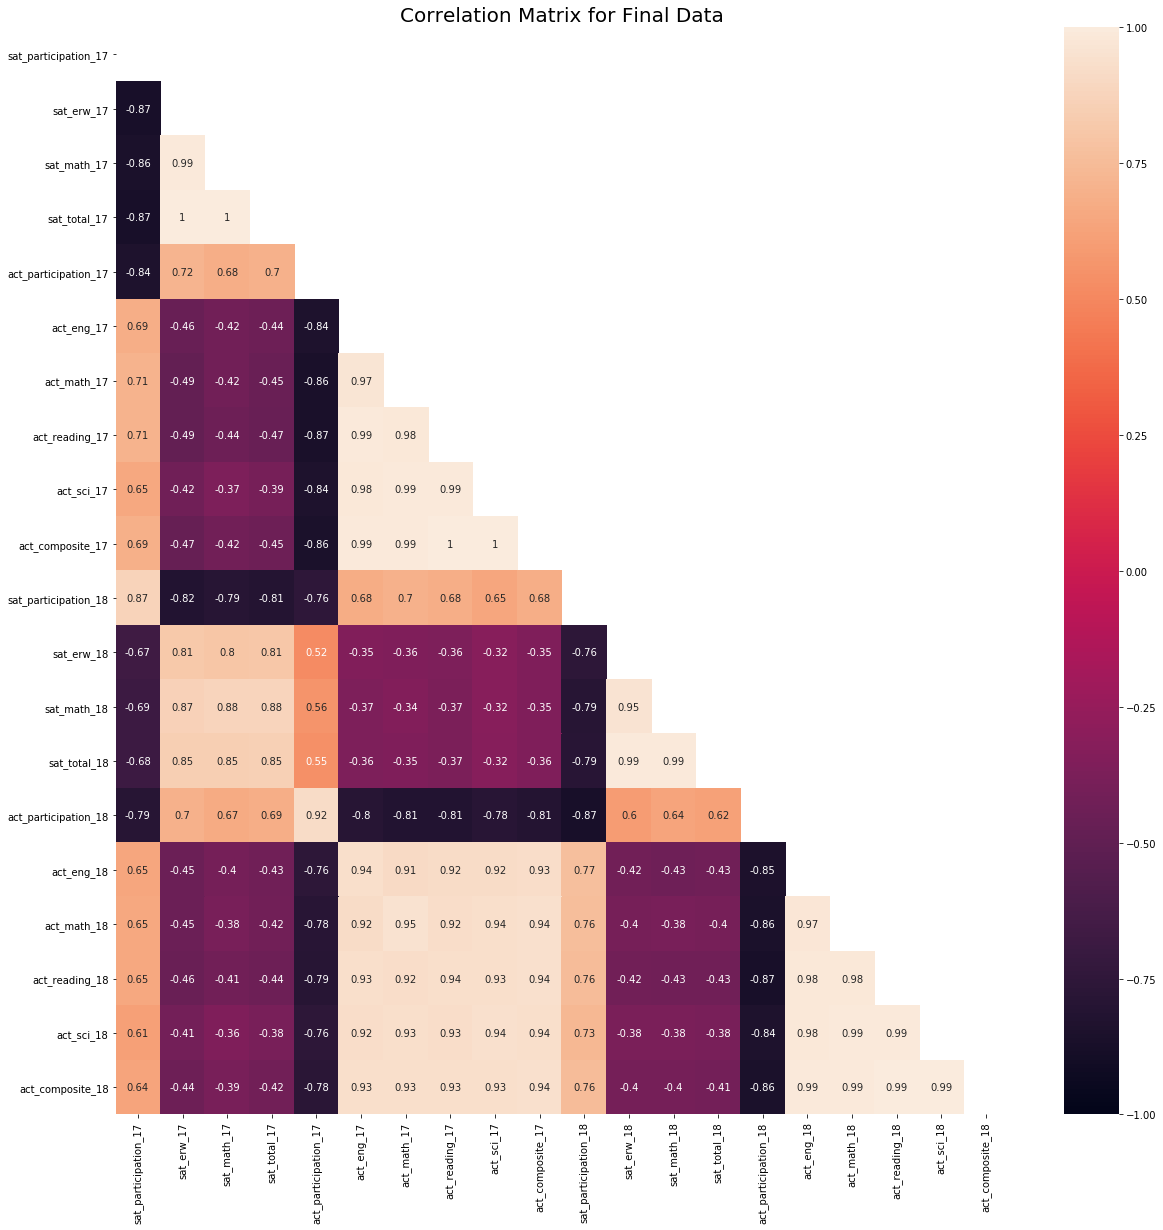

In [483]:
#Code:
#Plotting correlation matrix
mask = np.triu(final.corr())
plt.figure(figsize =(20, 20))
ax = plt.axes()
ax.set_title('Correlation Matrix for Final Data', size = 20)
sns.heatmap(final.corr(), annot= True, mask = mask, vmin = -1, vmax = 1, ax = ax);

The correlation matrix shows a fairly strong negative correlation between the sat participation rate and act participation rate. The correlation between an exam's participation rate and total/composite scores on the exam is also strongly negative. 

However, we do note that year-on-year test scores are strongly positively correlated.

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [484]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) 
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize = (12, 12)) 
    ax = ax.ravel() 
    for i, column in enumerate(list_of_columns): 
        ax[i].hist(dataframe[column])
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel(list_of_xlabels[i])
        ax[i].set_ylabel('Count')
        ax[i].set_ylim(0, 25, 5)

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

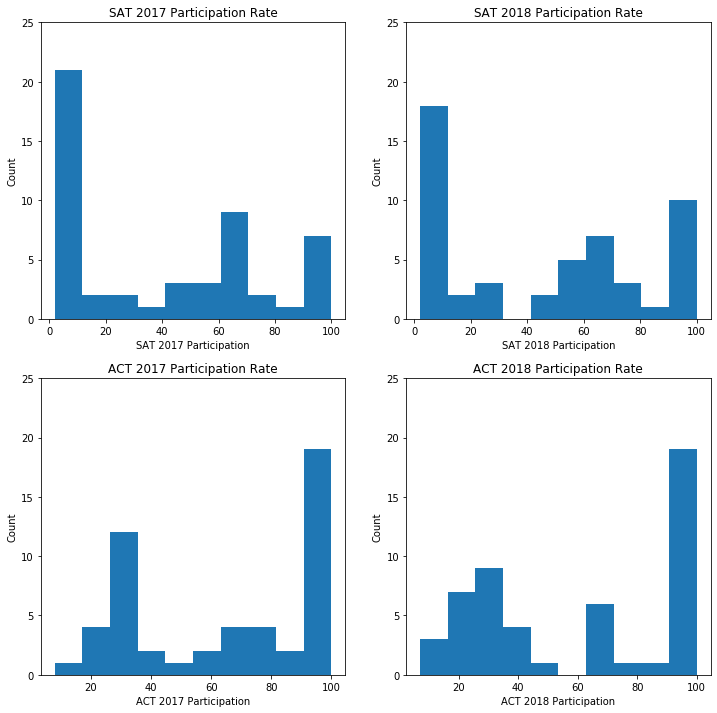

In [485]:
# Code
#Participation rates for the SAT and ACT 
part_columns = ['sat_participation_17', 'sat_participation_18', 
                    'act_participation_17', 'act_participation_18']
part_titles = ['SAT 2017 Participation Rate', 'SAT 2018 Participation Rate',
                   'ACT 2017 Participation Rate', 'ACT 2018 Participation Rate' ]
part_xlabels = ['SAT 2017 Participation', 'SAT 2018 Participation', 
                'ACT 2017 Participation', 'ACT 2018 Participation']
subplot_histograms(final, part_columns , part_titles, part_xlabels)

Distribution of the SAT participation rate is right-skewed, whereas distribution of the ACT participation is left-skewed, showcasing the overall preference for the ACT.

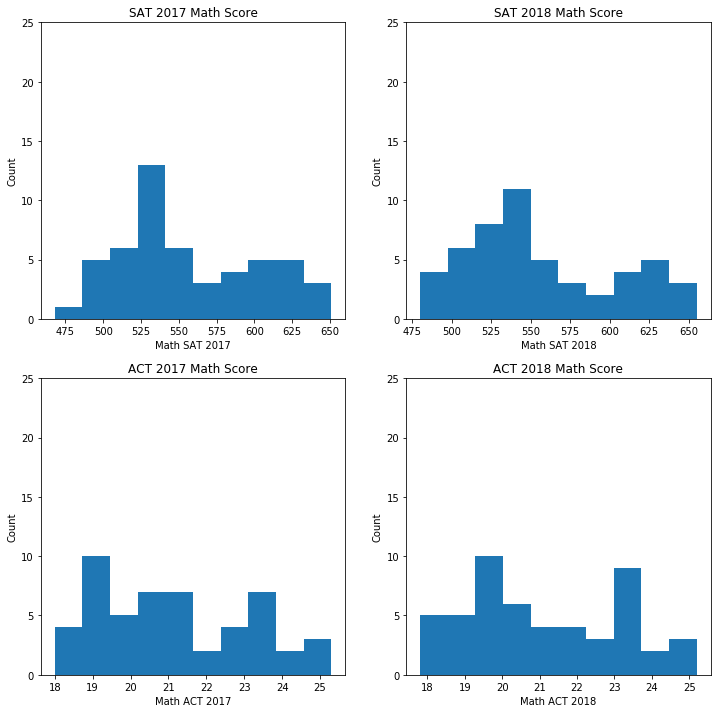

In [486]:
#Math Scores for the SAT and ACT 
math_columns = ['sat_math_17', 'sat_math_18', 
                'act_math_17', 'act_math_18']
math_titles = ['SAT 2017 Math Score', 'SAT 2018 Math Score',
                'ACT 2017 Math Score', 'ACT 2018 Math Score' ]
math_xlabels = ['Math SAT 2017', 'Math SAT 2018', 'Math ACT 2017', 'Math ACT 2018']
subplot_histograms(final, math_columns , math_titles, math_xlabels)

The SAT math scores are somewhat right-skewed, while the ACT math scores seem more evenly spread out. 

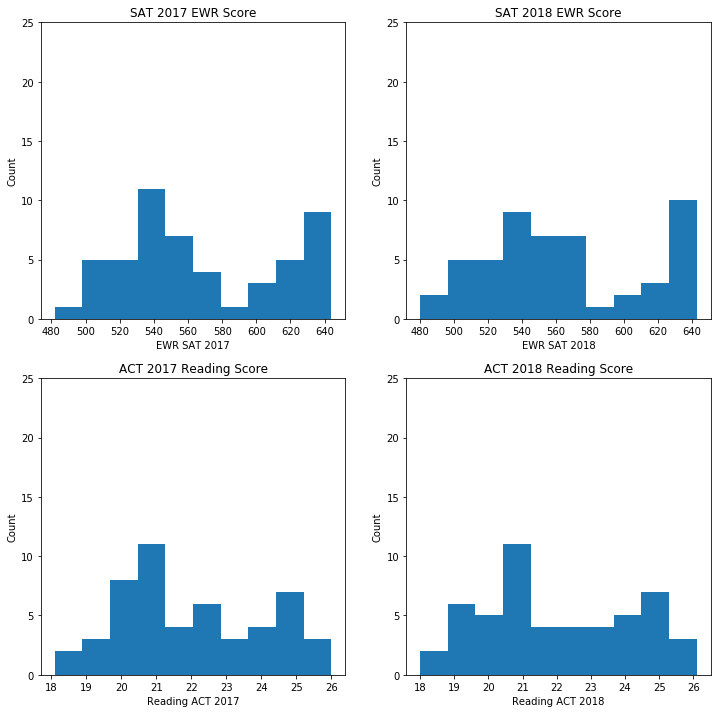

In [487]:
#Reading/verbal scores for the SAT and ACT
reading_columns = ['sat_erw_17', 'sat_erw_18', 
                'act_reading_17', 'act_reading_18']
reading_titles = ['SAT 2017 EWR Score', 'SAT 2018 EWR Score',
                'ACT 2017 Reading Score', 'ACT 2018 Reading Score' ]
reading_xlabels = ['EWR SAT 2017', 'EWR SAT 2018', 'Reading ACT 2017', 'Reading ACT 2018']
subplot_histograms(final, reading_columns , reading_titles, reading_xlabels)

The ACT reading scores are somewhat right-skewed, while the SAT reading scores have more than one peak.

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [488]:
# Code:
def scatter_plt(dataframe, x_variable, y_variable, title, x_label, y_label):
    sns.lmplot(data=dataframe, x=x_variable, y= y_variable)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show();

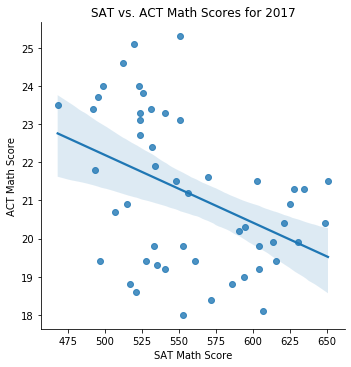

In [489]:
#Code:
#SAT vs. ACT math scores for 2017
scatter_plt(final, 'sat_math_17','act_math_17', title = 'SAT vs. ACT Math Scores for 2017', 
            x_label = 'SAT Math Score', y_label = 'ACT Math Score')

The SAT and ACT math scores do not seem to be very closely related based on the distance of the points from the line of best fit.

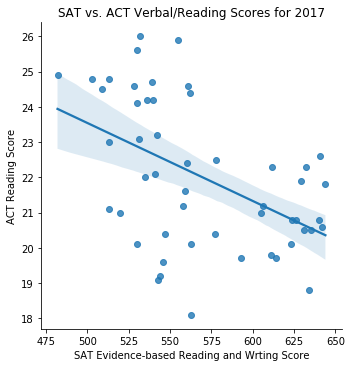

In [490]:
#Code:
#SAT vs. ACT verbal/reading scores for 2017
scatter_plt(final, 'sat_erw_17','act_reading_17', title = 'SAT vs. ACT Verbal/Reading Scores for 2017', 
            x_label = 'SAT Evidence-based Reading and Wrting Score', y_label = 'ACT Reading Score')

The SAT ERW scores and ACT reading scores do not seem to be very closely related based on the distance of the points from the line of best fit.

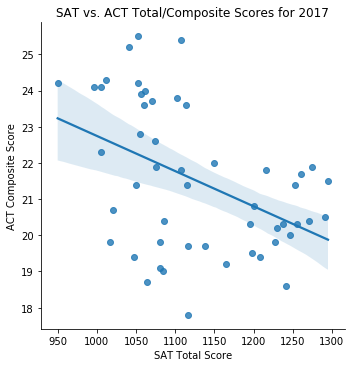

In [491]:
#Code:
#SAT vs. ACT total/composite scores for 2017
scatter_plt(final, 'sat_total_17','act_composite_17', title = 'SAT vs. ACT Total/Composite Scores for 2017', 
            x_label = 'SAT Total Score', y_label = 'ACT Composite Score')

Likewise, the SAT total score and ACT composite score do not seem to be very closely related.

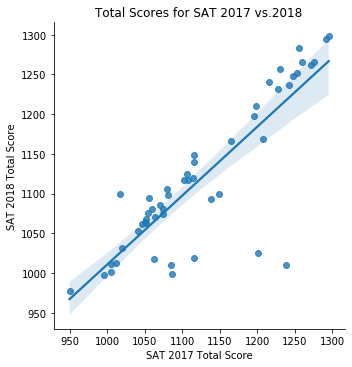

In [492]:
#Code:
#Total scores for SAT 2017 vs.2018
scatter_plt(final, 'sat_total_17','sat_total_18', title = 'Total Scores for SAT 2017 vs.2018', 
            x_label = 'SAT 2017 Total Score', y_label = 'SAT 2018 Total Score')

The SAT 2017 and 2018 total scores show a strong linear relationship.

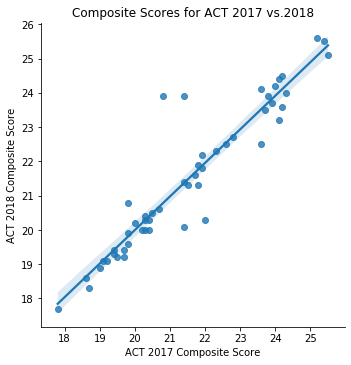

In [493]:
#Code:
#Composite scores for ACT 2017 vs.2018
scatter_plt(final, 'act_composite_17','act_composite_18', title = 'Composite Scores for ACT 2017 vs.2018', 
            x_label = 'ACT 2017 Composite Score', y_label = 'ACT 2018 Composite Score')

Similarly, the ACT 2017 and 2018 composite scores show a strong linear relationship.

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

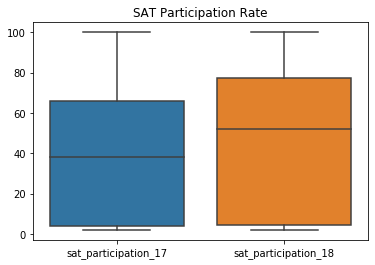

In [494]:
#Code:
#Plots for 2017 and 2018 SAT participation rate
sns.boxplot(data = final[['sat_participation_17', 'sat_participation_18']]).set_title('SAT Participation Rate');

As we have observed previously, the SAT participation rates tend to be in the lower range, with the majority being below 60%.

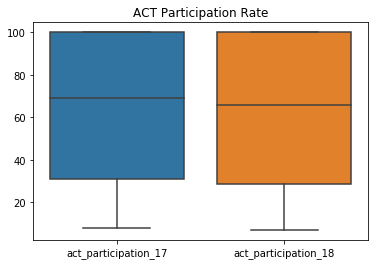

In [495]:
#Code:
#Plots for 2017 and 2018 ACT participation rate
sns.boxplot(data = final[['act_participation_17', 'act_participation_18']]).set_title('ACT Participation Rate');

Conversely, the ACT participation rates are generally higher.

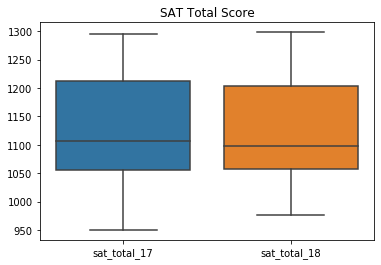

In [496]:
#Code:
#Plots for 2017 and 2018 SAT total score
sns.boxplot(data = final[['sat_total_17', 'sat_total_18']]).set_title('SAT Total Score');

The average SAT total scores largely fall between 1050 - 1200.

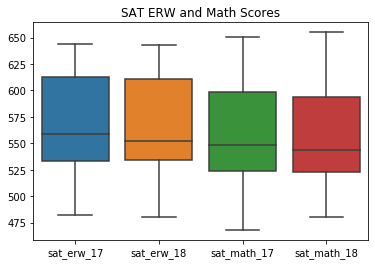

In [497]:
#Code:
#Plots for 2017 and 2018 SAT evidence-based reading and writing, math scores
sns.boxplot(data = final[['sat_erw_17', 'sat_erw_18', 'sat_math_17', 'sat_math_18']]
           ).set_title('SAT ERW and Math Scores');

The SAT ERW scores tend to be higher than the SAT math scores.

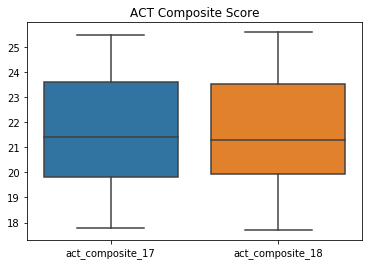

In [498]:
#Code:
#Plots for 2017 and 2018 ACT composite score
sns.boxplot(data = final[['act_composite_17', 'act_composite_18']]).set_title('ACT Composite Score');

The average ACT composite score falls between 20 - 24.

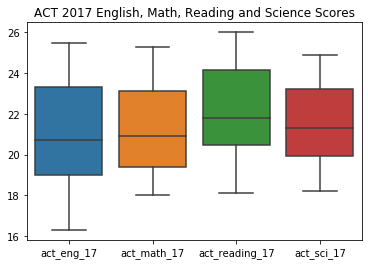

In [499]:
#Code:
#Plots for 2017 ACT english, math, reading and science scores
sns.boxplot(data = final[['act_eng_17', 'act_math_17', 'act_reading_17', 'act_sci_17']]
           ).set_title('ACT 2017 English, Math, Reading and Science Scores');

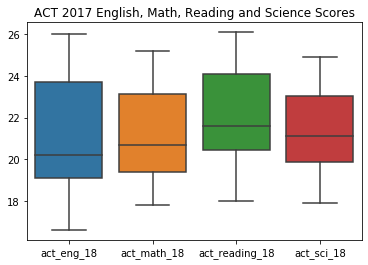

In [500]:
#Code:
#Plots for 2018 ACT english, math, reading and science scores
sns.boxplot(data = final[['act_eng_18', 'act_math_18', 'act_reading_18', 'act_sci_18']]
           ).set_title('ACT 2017 English, Math, Reading and Science Scores');

The average ACT reading score tends to be the highest amongst the 4 sections.

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

Text(0, 0.5, 'Participation')

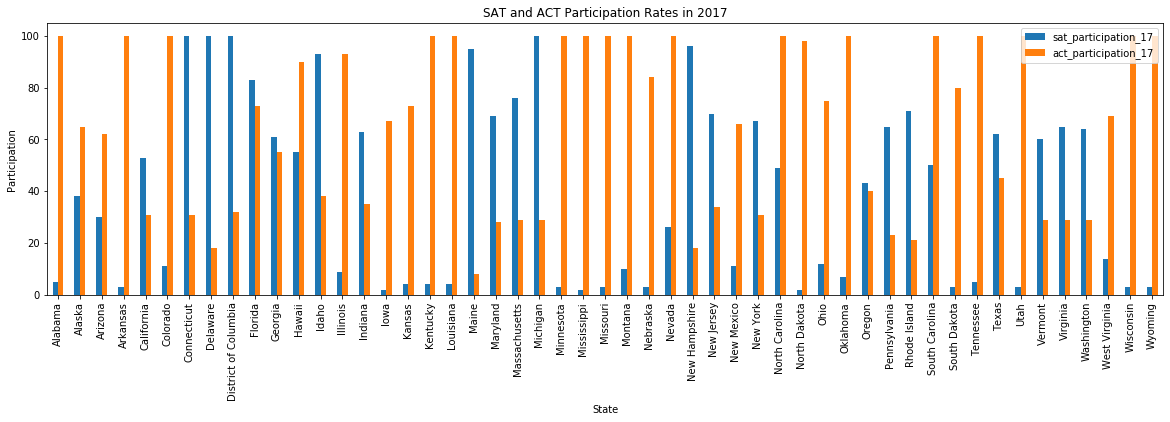

In [501]:
#Code:
#Observing the participation rates for the SAT and ACT in 2017
ax = final.plot(kind = 'bar', x = 'state', y = ['sat_participation_17', 'act_participation_17'],
           title = 'SAT and ACT Participation Rates in 2017', figsize=(20, 5));
ax.set_xlabel('State')
ax.set_ylabel('Participation')

At a quick glance, we can see that the ACT has higher participation rates across many states in 2017.

Text(0, 0.5, 'Participation')

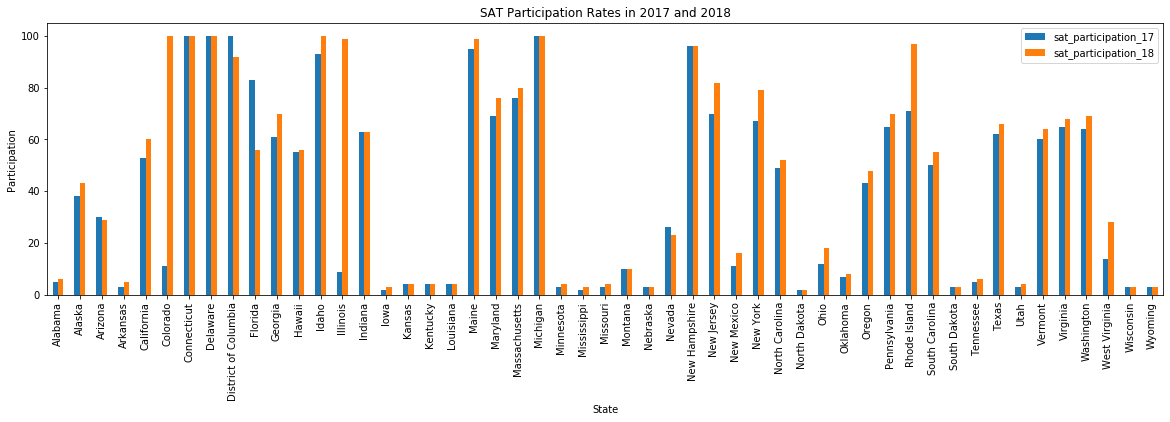

In [503]:
#Code:
#Observing the participation rates for the SAT in 2017 and 2018
ax = final.plot(kind = 'bar', x = 'state', y = ['sat_participation_17', 'sat_participation_18'],
           title = 'SAT Participation Rates in 2017 and 2018', figsize=(20, 5));
ax.set_xlabel('State')
ax.set_ylabel('Participation')

Participation for the SAT has fallen in some states like Arizona, District of Columbia, Florida and Nevada.

Text(0, 0.5, 'Participation')

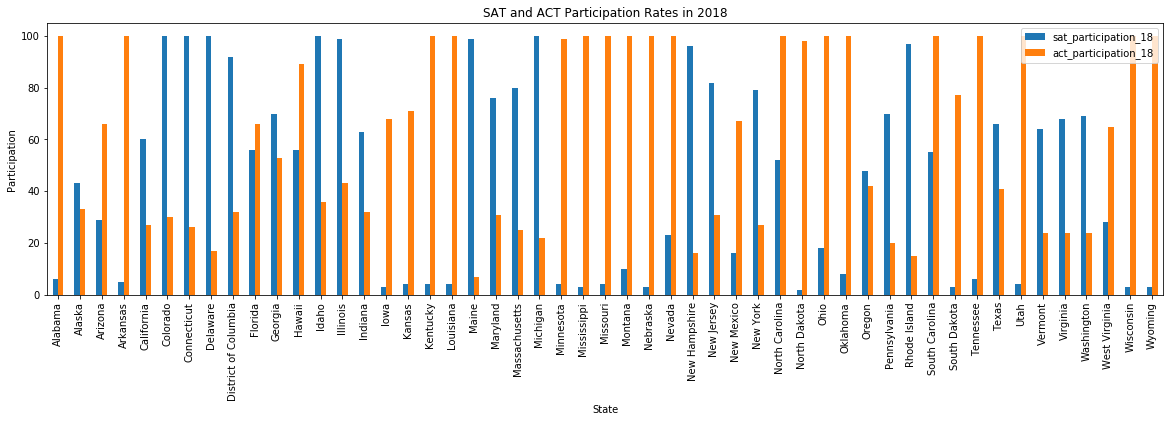

In [502]:
#Code:
#Observing the participation rates for the SAT and ACT in 2018
ax = final.plot(kind = 'bar', x = 'state', y = ['sat_participation_18', 'act_participation_18'],
           title = 'SAT and ACT Participation Rates in 2018', figsize=(20, 5));
ax.set_xlabel('State')
ax.set_ylabel('Participation')

In 2018, the participation rates for the ACT continue to be high among many states. 

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers: Based on the analysis above:

SAT has an average participation rate of 39.8 in 2017 and 45.8 in 2018. However, standard deviation is high as well (35.3 in 2017 and 37.31 in 2018), indicating that the data is spread out. The distribution of the participation rates is right-skewed.

The average SAT total score was 1126.1 in 2017 (with a standard deviation of 92.5) and 1120.1 in 2018 (with a standard deviation of 94.2). The distribution is somewhat left-skewed.

The average SAT ERW score was 569.1 in 2017 and 563.7 in 2018. The standard deviation was 45.7 in 2017 and 47.5 in 2018. The distribution of the scores is left-skewed.

The average SAT math score was 556.9 in 2017 and 556.2 in 2018. The standard deviation was 47.1 in 2017 and 47.8 in 2018. The distribution of the scores is left-skewed.

On the other hand, the ACT shows an average participation rate of 65.3 in 2017 and 61.6 in 2018. The standard deviation is high too (32.4 in 2017 and 34.1 in 2018). The distribution of the participation rates is more left-skewed.

The average ACT composite score was 21.5 in 2017 and 2018. The standard deviation was 2.1 in 2017 and 2018. The scores seem to be more evenly distributed.

The average ACT english score was 20.9 in 2017 and 21 in 2018. The standard deviation was 2.4 in 2017 and 2018. The distribution of the scores is more left-skewed.

The average ACT math score was 21.2 in 2017 and 21.1 in 2018. The standard deviation was 2.0 in 2017 and 2018. The distribution of the scores is somewhat left-skewed.

The average ACT reading score was 22.0 in 2017 and 2018. The standard deviation was 2.4 in 2017 and 2.2 in 2018. The distribution of the scores is somewhat left-skewed.

The average ACT science score was 21.5 in 2017 and 21.3 in 2018. The standard deviation was 1.7 in 2017 and 1.9 in 2018. The distribution of the scores is somewhat left-skewed.


#### Distributions in the data

In this dataset, each data represents a sample from a population.                        
For example, for ACT math test:
- Population: the test results of all the students who take this test, nation-wide.
- Population mean: is the national average of ACT math test (total scores/total no. of test takers) 
- Sample: the state means of ACT math test. We have 51 samples (51 states)

***According to CLT, we generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?***

Answer: We do not observe this trend as the sample sizes would differ based on the population of each state. For the CLT theorem to hold true, each sample must be of the same size.

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:
We do not observe normal distributions within the math and reading scores, as well as the participation rates. The average math scores would not normalize as the average can differ based on the state population and the participation rate. Likewise for the average reading scores. For participation, the average rates will also differ based on the state's total population. As such, estimates made from these datasets can be inaccurate given that individual scores can vary greatly in comparison to the average scores. 

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer: It may not be accurate to conduct statistical inference given the participation rate is a percentage value calculated on the total test-giving population in a particular state which can differ greatly. 

##### Is it appropriate to compare *these* specific SAT and ACT math scores  - can we say students with higher SAT math score is better than those with lower ACT math score, or vice versa?

Why or why not?

Answer: We are not able to make this deduction because the ACT composite score is an average of the score on 4 sections - math, english, science and reading. A lower math score on the ACT can still result in a good composite score if the student performs well on the other 3 sections.

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

Based on the EDA, we observed that SAT participation for Colorado went up from 11% in 2017 to 100% in 2018. Upon research, we find that Colorado is one of the states that requires students to take the SAT. In addition, it was one of the nine states that administered the SAT during the school day in 2017 at no cost to students. These reasons could have potentially led to an increase in the participation rates.

On the flip side, states like Mississippi and Missouri require students to take the ACT examination, and even administer the examination for free. This helps explain the 100% participation rates for the ACT in these states, and subsequently the low SAT participation rates as the state does not require the students to take the SAT.

<b> Sources: </b>

States That Provide the ACT for Free (https://magoosh.com/hs/act/2017/states-provide-act-free/)

2017 Report Overview (https://reports.collegeboard.org/archive/sat-suite-program-results/2017/overview)

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

Based on the exploration of the SAT and ACT data for 2017 and 2018 we see that average SAT participation has increased marginally from 2017 to 2018. However, the ACT continues to have a stronghold in many states. Not surprisingly, there is an inverse relationship between the SAT participation and ACT participation, suggesting that students seem to prefer to take one exam. Based on research, it also seems that the choice of exam is heavily influenced by state policies and requirements.

While the College Board may require more time to influence state policies and requirements, it can focus on states like Florida in the meanwhile where participation has fallen and there are no mandates from the state requiring students to take a particular exam. The College Board can recreate its success in Colorado by working with schools to administer the SAT during the school day for no cost to students. 

For further analysis, it would be great to get official data on the state requirements and resources for both the SAT and ACT to see how those factors influence participation rates.